Nome: Sandra Rojas Zegarrundo GU3030768

Análise e exploração dos Dados

Durante essa fase a análise e exploração dos dados deve ser realizada, por meio das etapas de:

    Preparar os dados
    Analisar os atributos
    Analisar as relações entre os atributos de forma bivariada e multivariada
    Identificar possíveis casos atípicos
    Avaliar a presença de dados ausentes
    Avaliar suposições básicas

Duvidas quanto ao processo podem ser retiradas antes ou durante as aulas.
Prazos de entrega

    até o dia 29/04/2024 às 23h55

Observações importantes

    Trabalho individual;
    As bases de dados escolhidas devem ser retiradas exclusivamente dos três links disponibilizados no projeto.
    Caso tenha cursado anteriormente a disciplina sua base de dados escolhida deve ser diferente das escolhidas nos semestres anteriores.

    Link da base: 
    https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os #  interagir com o sistema operacional 
import glob # usado para encontrar todos os nomes de arquivos que correspondem a um padrão especificado

In [3]:
# Caminho da pasta onde os arquivos CSV estão armazenados
caminho = r'C:\Users\Sandra\TE2D6_Python_IF\IF\bases'

In [4]:
# Usar glob para obter todos os arquivos CSV na pasta
csv_arquivos = glob.glob(os.path.join(caminho, '*.csv'))

In [5]:
# Lista para armazenar os DataFrames
dataframes = []

# Loop sobre a lista de arquivos CSV
for arquivo in csv_arquivos:
    df = pd.read_csv(arquivo, sep=';')  # Especificar o separador como ponto e vírgula
    dataframes.append(df)  # Adicionar o DataFrame à lista

# Concatenar todos os DataFrames em um único DataFrame
df_combustiveis = pd.concat(dataframes, ignore_index=True)

In [6]:
df_combustiveis.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,01/01/2024,"3,99",NaN,R$ / litro,VIBRA


In [15]:
df_combustiveis.tail(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
560767,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,GASOLINA,31/12/2024,"6,39",NaN,R$ / litro,ALE
560768,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,GASOLINA ADITIVADA,31/12/2024,"6,39",NaN,R$ / litro,ALE
560769,CO,GO,FORMOSA,PARANA DE FORA COMERCIO DE COMBUSTIVEIS E LUBR...,48.113.920/0001-42,AVENIDA A,SN,LOTE 7-A QUADRA88,PARQUE DA COLINA II,73808-192,ETANOL,31/12/2024,"4,39",NaN,R$ / litro,ALE


In [7]:
df_combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560770 entries, 0 to 560769
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     560770 non-null  object 
 1   Estado - Sigla     560770 non-null  object 
 2   Municipio          560770 non-null  object 
 3   Revenda            560770 non-null  object 
 4   CNPJ da Revenda    560770 non-null  object 
 5   Nome da Rua        560770 non-null  object 
 6   Numero Rua         560639 non-null  object 
 7   Complemento        124456 non-null  object 
 8   Bairro             559850 non-null  object 
 9   Cep                560770 non-null  object 
 10  Produto            560770 non-null  object 
 11  Data da Coleta     560770 non-null  object 
 12  Valor de Venda     560770 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  560770 non-null  object 
 15  Bandeira           560770 non-null  object 
dtypes:

In [17]:
df_combustiveis.isnull()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560765,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
560766,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
560767,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
560768,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [8]:
df_combustiveis.isnull().sum()

Regiao - Sigla            0
Estado - Sigla            0
Municipio                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Numero Rua              131
Complemento          436314
Bairro                  920
Cep                       0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra      560770
Unidade de Medida         0
Bandeira                  0
dtype: int64

In [19]:
# Na quantidade de linha consta o cabeçalho
df_combustiveis.shape

(560770, 16)

In [10]:
# Os dados de Valor de Compra são 100% nulos
nulos_valor_compra = 560770/560770
nulos_valor_compra

1.0

<Axes: >

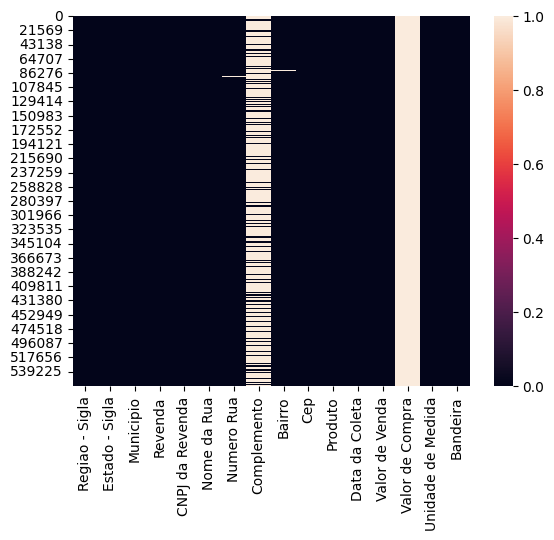

In [20]:
sns.heatmap(df_combustiveis.isnull())

In [13]:
df_combustiveis.nunique()

Regiao - Sigla           5
Estado - Sigla          27
Municipio              459
Revenda               9656
CNPJ da Revenda      10981
Nome da Rua           7058
Numero Rua            3774
Complemento           1936
Bairro                4857
Cep                   8326
Produto                  3
Data da Coleta         250
Valor de Venda         561
Valor de Compra          0
Unidade de Medida        1
Bandeira                51
dtype: int64

In [11]:
df_combustiveis['Unidade de Medida'].unique()

array(['R$ / litro'], dtype=object)

In [12]:
df_combustiveis['Produto'].unique()

array(['GASOLINA', 'GASOLINA ADITIVADA', 'ETANOL'], dtype=object)

In [14]:
"""
- Removendo colunas com dados micros em que são repetidos, visto que já se tem os mesmos dados no macro como Região, Estado, Municipio
- Removi também CNPJ da Revenda porque já há o nome Revenda para análise
- axis = 1 porque estou removendo as colunas
- Valor de Compra também foi deletado por que não há nenhum valor
- A coluna Unidade de Medida também removi porque não será utilizado na análise

"""

df_combustiveis_2 = df_combustiveis.drop(['Nome da Rua','Numero Rua', 'Complemento', 'Bairro', 'Cep', 'CNPJ da Revenda', 'Valor de Compra', 'Unidade de Medida'], axis = 1)

In [15]:
# para que a conversão ocorra com sucesso primeiro foi alterado ','  para '.', logo em seguir se transforma o object (Valor) para float
df_combustiveis_2['Valor de Venda'] = df_combustiveis_2['Valor de Venda'].str.replace(',', '.').astype(float)

In [16]:
df_combustiveis_2.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA,01/01/2024,5.68,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA ADITIVADA,01/01/2024,5.68,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,01/01/2024,3.99,VIBRA
3,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,GASOLINA,01/01/2024,5.48,VIBRA
4,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,GASOLINA,01/01/2024,5.69,BRANCA


In [17]:
cat_col = [col for col in df_combustiveis_2.columns if df_combustiveis_2[col].dtype == 'object']
cat_col

['Regiao - Sigla',
 'Estado - Sigla',
 'Municipio',
 'Revenda',
 'Produto',
 'Data da Coleta',
 'Bandeira']

In [18]:
# não apareceu nenhum dado porque todos os dados estão como object
num_col = [col for col in df_combustiveis_2.columns if df_combustiveis_2[col].dtype != 'object']
num_col

['Valor de Venda']

In [22]:
# Quantidade de dados object
df_combustiveis_2[cat_col].nunique()

Regiao - Sigla       5
Estado - Sigla      27
Municipio          459
Revenda           9656
Produto              3
Data da Coleta     250
Bandeira            51
dtype: int64

In [20]:
df_combustiveis_2.dtypes

Regiao - Sigla     object
Estado - Sigla     object
Municipio          object
Revenda            object
Produto            object
Data da Coleta     object
Valor de Venda    float64
Bandeira           object
dtype: object

In [21]:
df_combustiveis_2.isnull().sum()

Regiao - Sigla    0
Estado - Sigla    0
Municipio         0
Revenda           0
Produto           0
Data da Coleta    0
Valor de Venda    0
Bandeira          0
dtype: int64

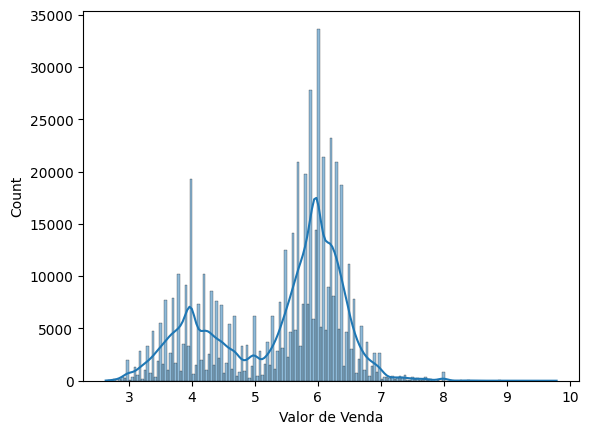

In [24]:
# Bimodal e os valores estão concentrados entre 3 e 7
sns.histplot(df_combustiveis_2['Valor de Venda'], kde=True);

<Axes: ylabel='Valor de Venda'>

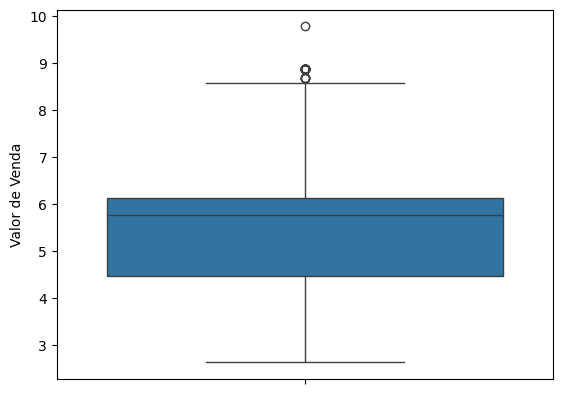

In [25]:
# Verificando outliers
sns.boxplot(df_combustiveis_2['Valor de Venda'])

In [26]:
def df_limpar(column, df):
    Q1, Q3 =np.percentile(df[column], [25, 75])
    IRQ = Q3 - Q1

    limite_inferior = Q1 - (1.5 * IRQ)
    limite_superior = Q3 + (1.5 * IRQ)

    df_limpo = df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]
    
    return df_limpo          

In [27]:
df_limpo = df_limpar('Valor de Venda', df_combustiveis_2)

<Axes: ylabel='Valor de Venda'>

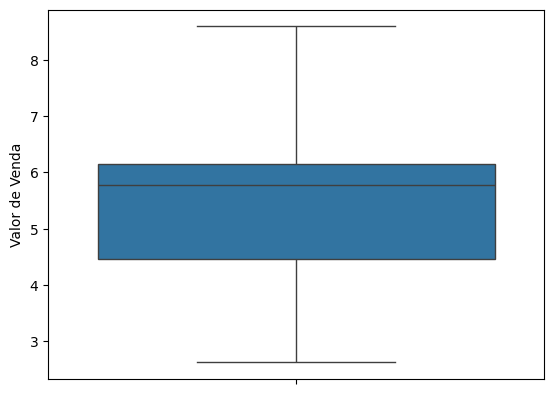

In [28]:
sns.boxplot(df_limpo['Valor de Venda'])

<Axes: >

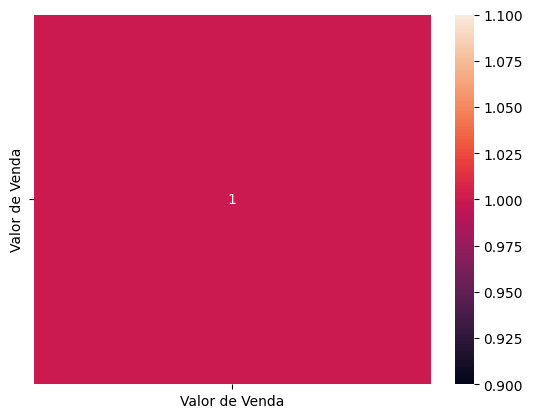

In [30]:
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True)

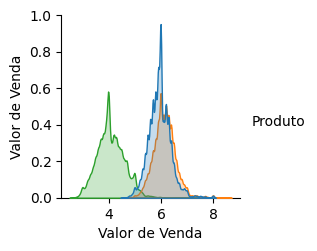

In [31]:
sns.pairplot(df_limpo, hue='Produto')

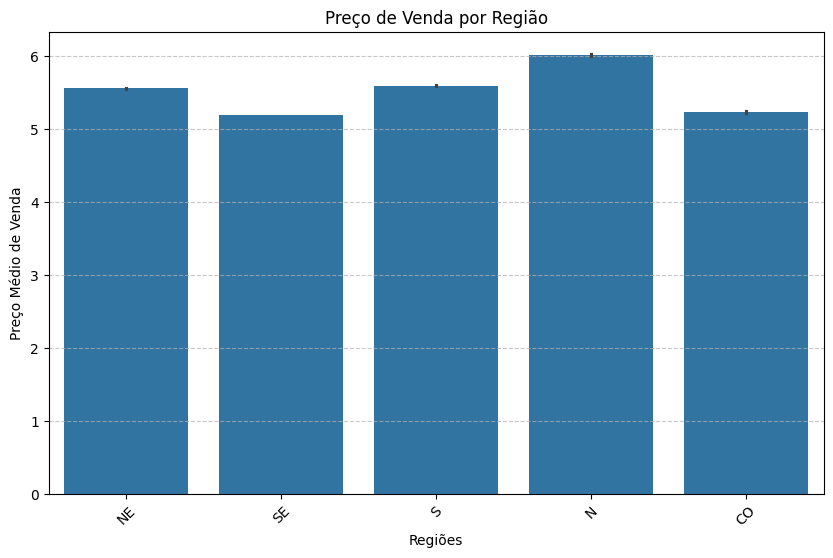

In [34]:
#A região no Norte tem em média o maior preço de venda e o Sudeste em média o menor preço
plt.figure(figsize=(10,6))
sns.barplot(data=df_limpo, x='Regiao - Sigla', y='Valor de Venda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Preço de Venda por Região')
plt.xlabel('Regiões')
plt.ylabel('Preço Médio de Venda')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Reforça que o maior preço de venda é na Região Norte e o menor preço é no Sudeste
grupo_regiao = df_limpo.groupby('Regiao - Sigla')
grupo_regiao.mean(numeric_only=True).round(2)

,Valor de Venda
Regiao - Sigla,
CO,5.24
N,6.02
NE,5.56
S,5.60
SE,5.20


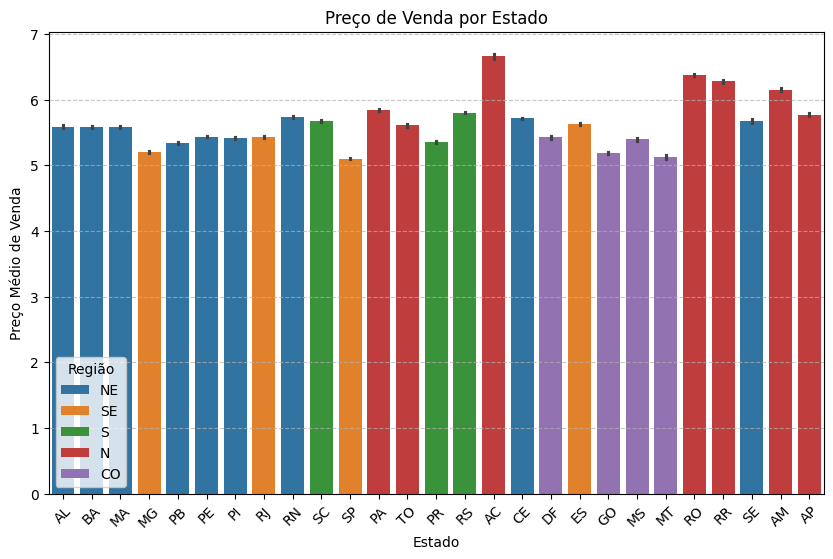

In [42]:
# O preço médio mais caro é no Estado do Acre da Região Norte
plt.figure(figsize=(10,6))
sns.barplot(data=df_limpo, x='Estado - Sigla', y='Valor de Venda', hue='Regiao - Sigla')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Preço de Venda por Estado')
plt.xlabel('Estado')
plt.ylabel('Preço Médio de Venda')
plt.legend(title='Região')
plt.xticks(rotation=45)
plt.show()

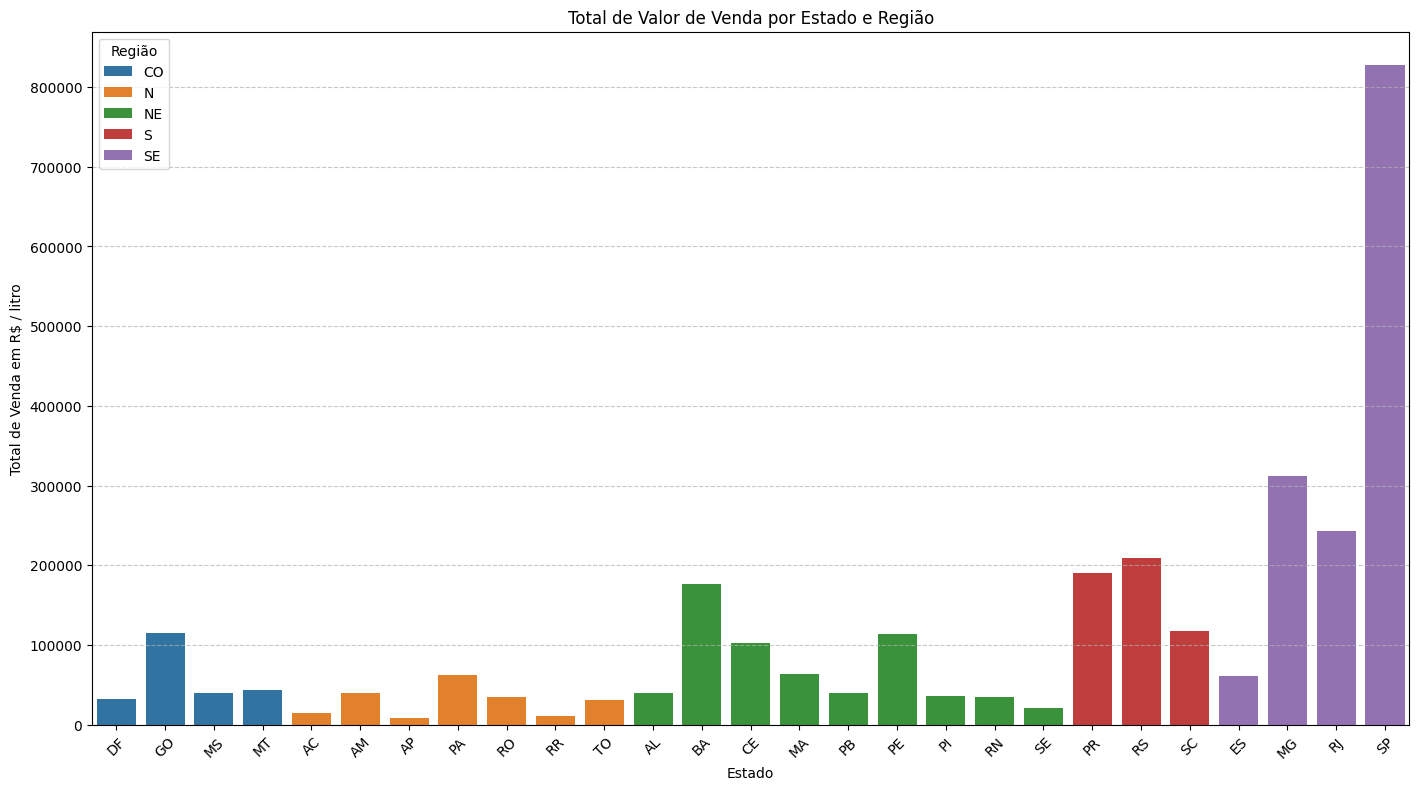

In [40]:
# Embora no Norte o preço seja mais caro, a venda é maior no Sudeste principalmente no Estado de São Paulo

# alpha=0.7: Define a transparência da grade. O valor varia de 0 (totalmente transparente) a 1 (totalmente opaco).
"""
Quando você agrupa dados, as colunas usadas para o agrupamento se tornam o índice do DataFrame resultante.
O reset_index() transforma essas colunas de volta em colunas normais do DataFrame, em vez de mantê-las como índice.
"""
total_venda_regiao = df_limpo.groupby(['Regiao - Sigla', 'Estado - Sigla'])['Valor de Venda'].sum().reset_index()

plt.figure(figsize=(17, 9))
sns.barplot(data=total_venda_regiao, x='Estado - Sigla', y='Valor de Venda', hue='Regiao - Sigla')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Total de Valor de Venda por Estado e Região')
plt.xlabel('Estado')
plt.ylabel('Total de Venda em R$ / litro')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.show()

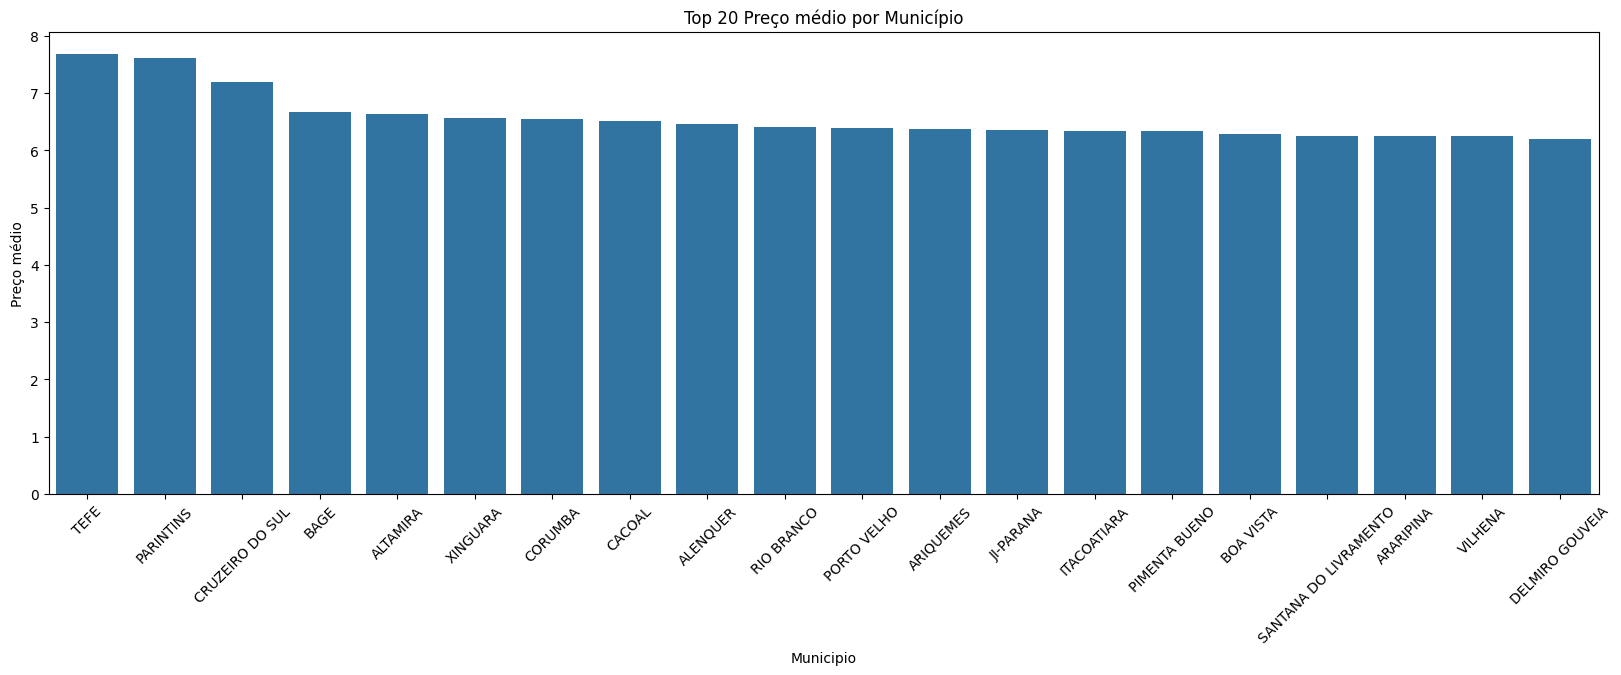

In [44]:
# Na cidade Tefe tem o maior preço em R$ / Litro
top_20_municipio = df_limpo.groupby('Municipio')['Valor de Venda'].mean().nlargest(20).reset_index()

plt.figure(figsize=(20,6))
sns.barplot(data=top_20_municipio, x='Municipio', y='Valor de Venda')
plt.title('Top 20 Preço médio por Município')
plt.ylabel('Preço médio')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Se observa que o maior preço médio é na cidade Tefe de 7,68 (R$ / litro)
preco_municipio = df_limpo.groupby(['Regiao - Sigla', 'Municipio'])['Valor de Venda'].mean().reset_index()
preco_municipio = preco_municipio.sort_values(by='Valor de Venda', ascending=False).round(2)
preco_municipio.head()

,Regiao - Sigla,Municipio,Valor de Venda
66,N,TEFE,7.68
58,N,PARINTINS,7.61
45,N,CRUZEIRO DO SUL,7.18
173,S,BAGE,6.66
34,N,ALTAMIRA,6.63


In [54]:
# Se observa que o menor preço médio é na cidade Presidente Venceslau de 4,60 (R$ / litro)
preco_municipio = df_limpo.groupby(['Regiao - Sigla', 'Municipio'])['Valor de Venda'].mean().reset_index()
preco_municipio = preco_municipio.sort_values(by='Valor de Venda', ascending=True).round(2)
preco_municipio.head()

,Regiao - Sigla,Municipio,Valor de Venda
398,SE,PRESIDENTE VENCESLAU,4.60
297,SE,COSMOPOLIS,4.65
407,SE,SANTA BARBARA D'OESTE,4.69
309,SE,FRUTAL,4.70
349,SE,LEME,4.71


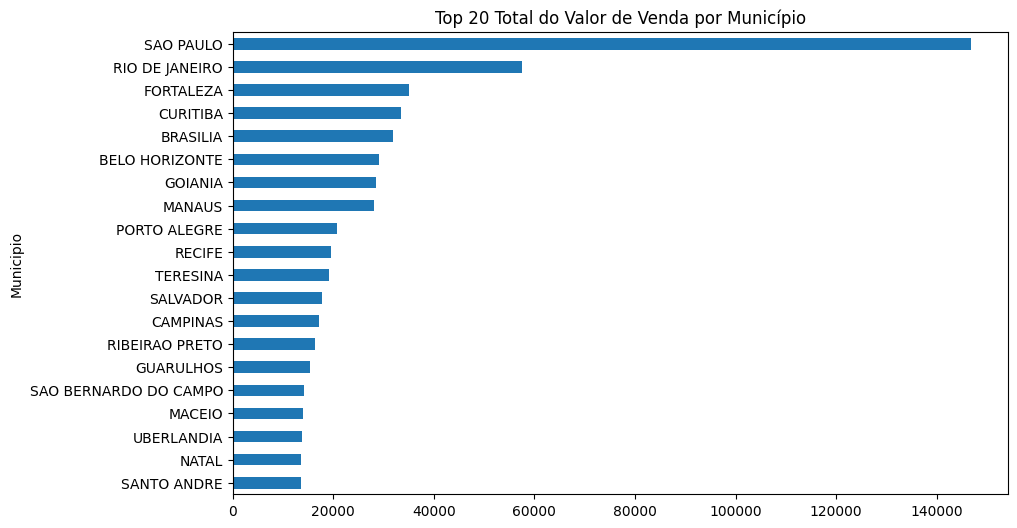

In [60]:
# Embora o preço seja maior na cidade de Tefe, o município São Paulo se destaca no valor total de venda
venda_municipio = df_limpo.groupby('Municipio')['Valor de Venda'].sum().nlargest(20)

plt.figure(figsize=(10,6))
venda_municipio.sort_values().plot(kind='barh')
plt.title('Top 20 Total do Valor de Venda por Município')
plt.show()

In [61]:
# Pode-se observar o valor total de venda por município
venda_municipio = venda_municipio.sort_values(ascending=False)
venda_municipio.head()

Municipio
SAO PAULO         146817.76
RIO DE JANEIRO     57538.83
FORTALEZA          34976.69
CURITIBA           33560.67
BRASILIA           31778.17
Name: Valor de Venda, dtype: float64

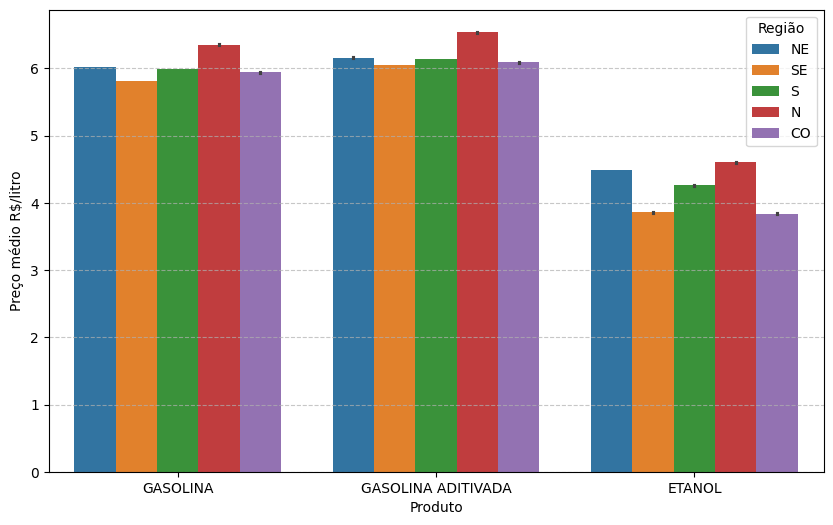

In [69]:
 # Produto mais caro em média é a Gasolina Aditiva principalmente na região Norte
 # Em todas as Regiões a média do preço do Etanol é menor em relação aos demais produtos
plt.figure(figsize=(10,6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.barplot(data=df_limpo, x='Produto', y='Valor de Venda', hue='Regiao - Sigla')
plt.ylabel('Preço médio R$/litro')
plt.legend(title='Região')
plt.show()

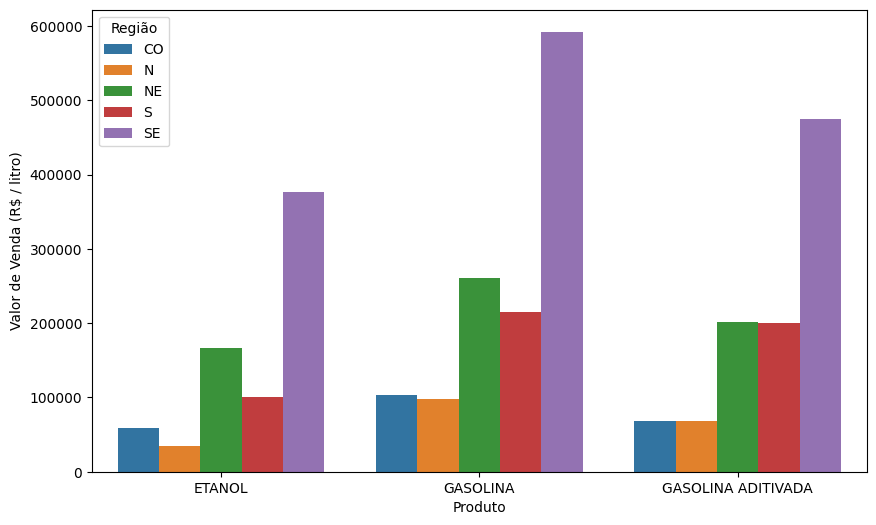

In [70]:
"""
Embora o Etanol tenha o preço médio mais baixo em relação aos demais produtos, não é o produto mais vendido em todas as Regiões
Além disso, observa-se que a Região Sudeste tem destaque de venda em todos os produtos, principalmente do produto Gasolina

"""
venda_produto = df_limpo.groupby(['Regiao - Sigla','Produto'])['Valor de Venda'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=venda_produto, x='Produto', y='Valor de Venda', hue='Regiao - Sigla')
plt.ylabel('Valor de Venda (R$ / litro)')
plt.legend(title='Região')
plt.show()

In [72]:
# Observa-se que o valor de venda é destaque no Município de São Paulo 
venda_produto = df_limpo.groupby(['Regiao - Sigla', 'Municipio', 'Produto'])['Valor de Venda'].sum().reset_index()
venda_produto = venda_produto.sort_values(by='Valor de Venda', ascending=False)
venda_produto.head(10)

,Regiao - Sigla,Municipio,Produto,Valor de Venda
1268,SE,SAO PAULO,GASOLINA ADITIVADA,55473.67
1267,SE,SAO PAULO,GASOLINA,55436.89
1266,SE,SAO PAULO,ETANOL,35907.20
1211,SE,RIO DE JANEIRO,GASOLINA ADITIVADA,22005.74
1210,SE,RIO DE JANEIRO,GASOLINA,21587.02
586,S,CURITIBA,GASOLINA,14496.92
1209,SE,RIO DE JANEIRO,ETANOL,13946.07
13,CO,BRASILIA,GASOLINA,13768.51
293,NE,FORTALEZA,GASOLINA,12994.04
14,CO,BRASILIA,GASOLINA ADITIVADA,12307.74


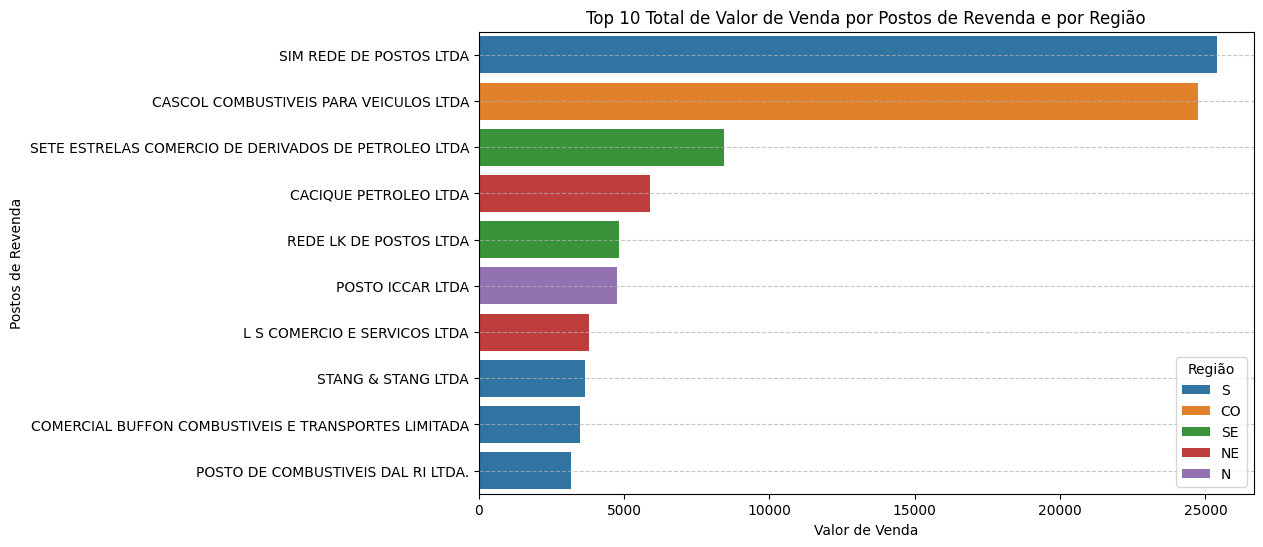

In [82]:
# O posto Revenda SIM REDE DE POSTOS LTDA apresenta o maior valor total de vendas e da Região Sul
postos_regiao = df_combustiveis_2.groupby(['Regiao - Sigla','Revenda'])['Valor de Venda'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=postos_regiao, y="Revenda", x="Valor de Venda", hue='Regiao - Sigla')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Top 10 Total de Valor de Venda por Postos de Revenda e por Região')
plt.ylabel('Postos de Revenda')
plt.legend(title='Região')
plt.show()

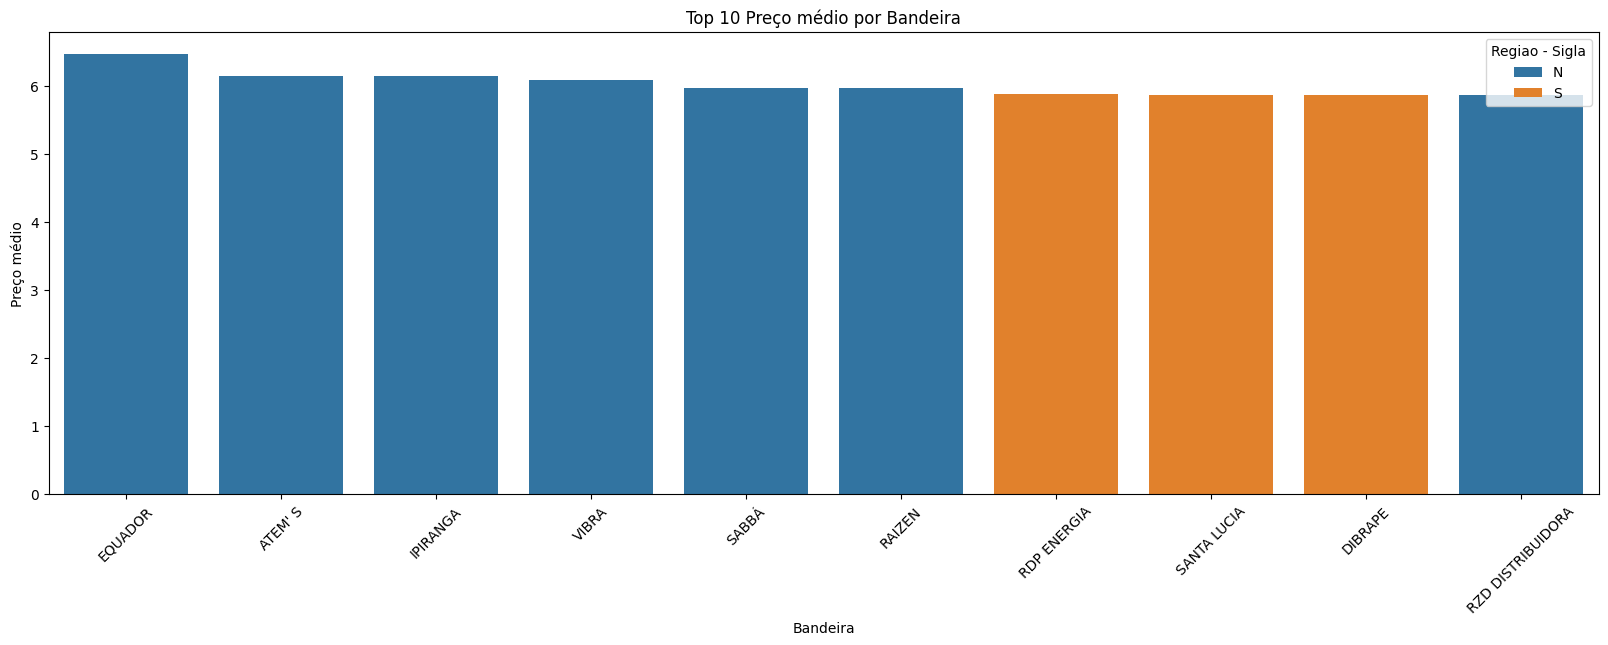

In [94]:
# O preço médio mais caro é da Bandeira Equador da Região Norte
top_10_bandeira = df_limpo.groupby(['Regiao - Sigla','Bandeira'])['Valor de Venda'].mean().nlargest(10).reset_index()

plt.figure(figsize=(20,6))
sns.barplot(data=top_10_bandeira, x="Bandeira", y="Valor de Venda", hue='Regiao - Sigla')
plt.title('Top 10 Preço médio por Bandeira')
plt.ylabel("Preço médio")
plt.xticks(rotation=45)
plt.show()

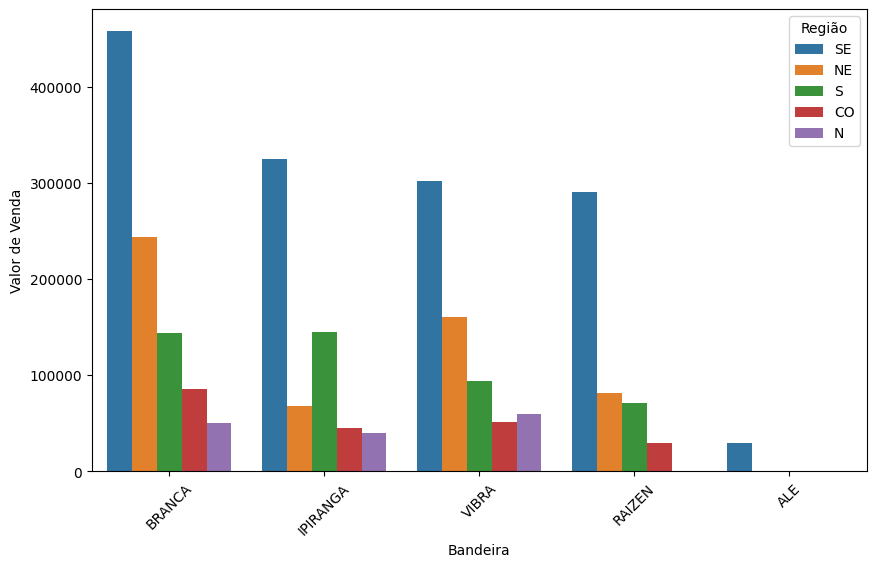

In [93]:
"""
Apesar do preço ser mais caro no posto de revenda Equador, o destaque de venda é do posto Branca seguida do posto Ipiranga
Nas bandeiras com mais venda se concentram na região Sudeste

"""

top_bandeira = df_limpo.groupby(['Regiao - Sigla','Bandeira'])['Valor de Venda'].sum().nlargest(20).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_bandeira, x="Bandeira", y="Valor de Venda", hue="Regiao - Sigla")
plt.legend(title="Região")
plt.xticks(rotation=45)
plt.show()

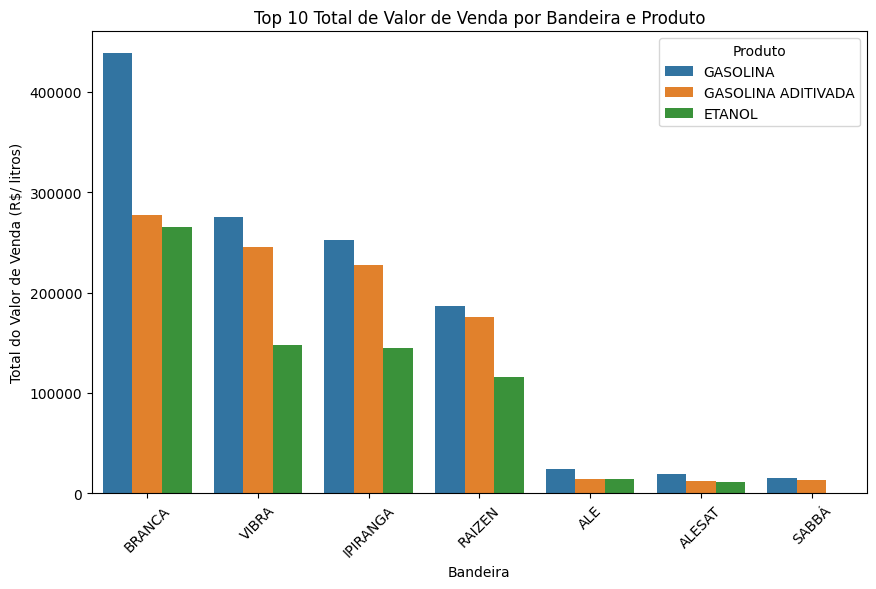

In [97]:
# A gasolina é o produto mais vendido em todos os postos destacados
top_produto_bandeira = df_limpo.groupby(['Produto','Bandeira'])['Valor de Venda'].sum().nlargest(20).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_produto_bandeira, x="Bandeira", y="Valor de Venda", hue='Produto')
plt.title('Top 10 Total de Valor de Venda por Bandeira e Produto')
plt.ylabel("Total do Valor de Venda (R$/ litros)")
plt.xticks(rotation=45)
plt.show()

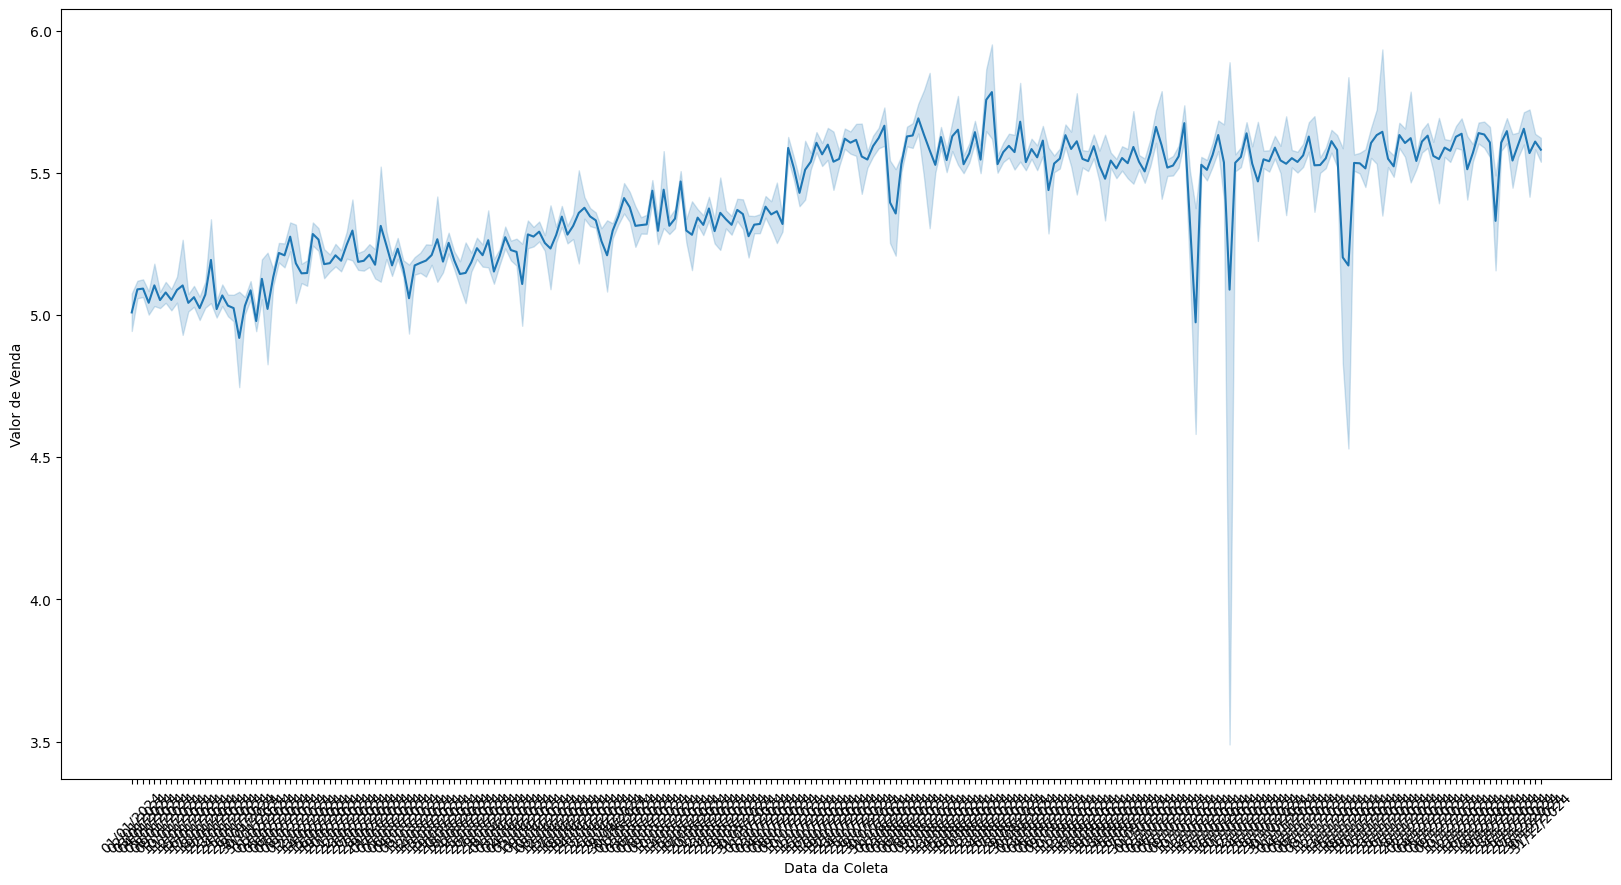

In [98]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_limpo, x='Data da Coleta', y='Valor de Venda')
plt.xticks(rotation=45)
plt.show()

In [100]:
# Transformação do dado para data para fazer análise por ano e mês
df_limpo.loc[:, 'Data da Coleta'] = pd.to_datetime(df_limpo['Data da Coleta'], format='%d/%m/%Y')
df_limpo.loc[:, 'Ano'] = df_limpo['Data da Coleta'].dt.year
df_limpo.loc[:, 'Mes'] = df_limpo['Data da Coleta'].dt.month

In [101]:
df_limpo.dtypes

Regiao - Sigla            object
Estado - Sigla            object
Municipio                 object
Revenda                   object
Produto                   object
Data da Coleta    datetime64[ns]
Valor de Venda           float64
Bandeira                  object
Ano                        int32
Mes                        int32
dtype: object

In [102]:
# Verificando que as colunas Ano e Mes foram adicionadas
df_limpo.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Bandeira,Ano,Mes
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA,2024-01-01,5.68,VIBRA,2024,1
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA ADITIVADA,2024-01-01,5.68,VIBRA,2024,1
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,2024-01-01,3.99,VIBRA,2024,1
3,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,GASOLINA,2024-01-01,5.48,VIBRA,2024,1
4,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,GASOLINA,2024-01-01,5.69,BRANCA,2024,1


In [103]:
df_limpo['Ano'].unique()

array([2024])

In [104]:
df_limpo['Mes'].unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12])

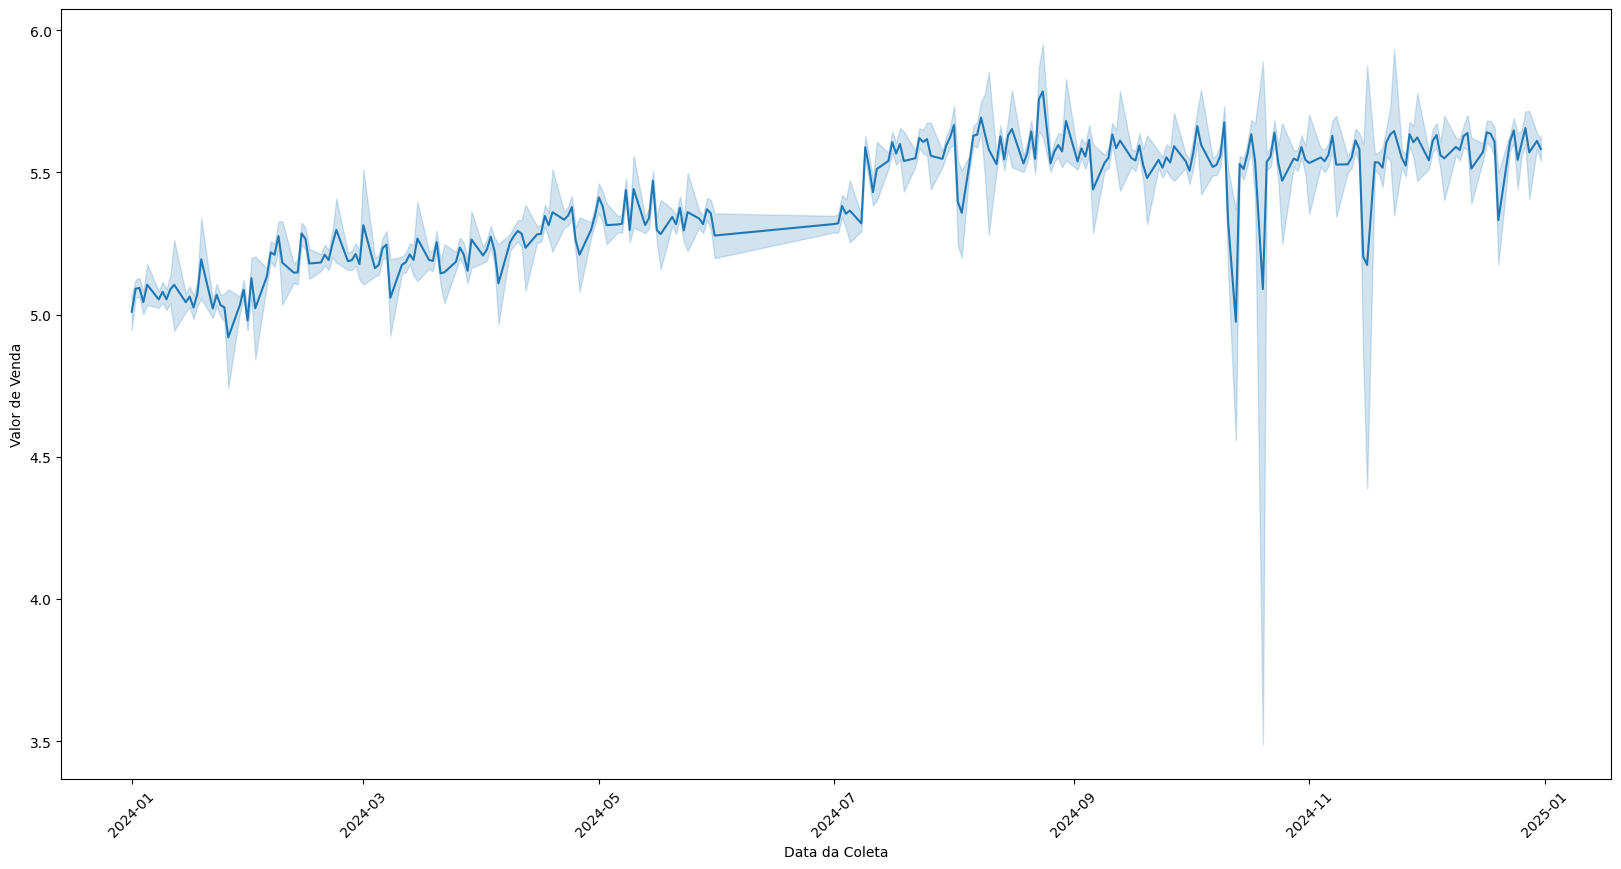

In [105]:
# Com transformação da data se pode visualizar o período no eixo x
plt.figure(figsize=(20,10))
sns.lineplot(data=df_limpo, x='Data da Coleta', y='Valor de Venda')
plt.xticks(rotation=45)
plt.show()

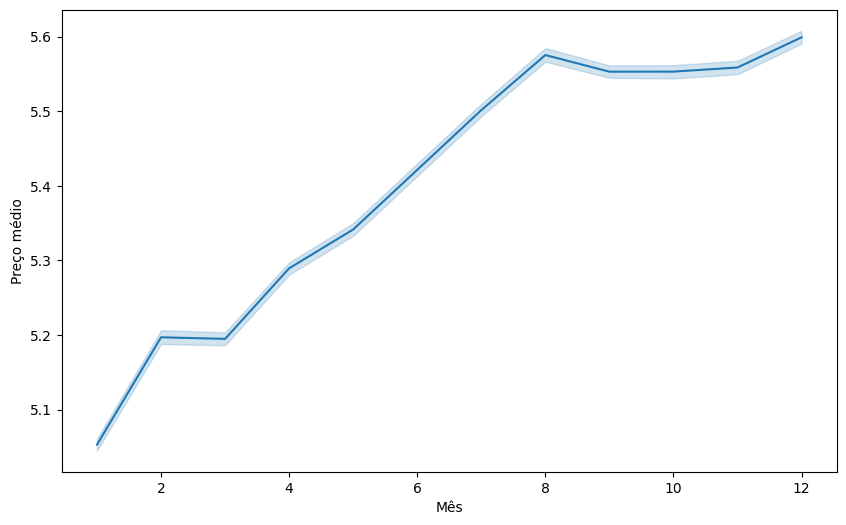

In [109]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_limpo, y='Valor de Venda', x='Mes')
plt.xlabel('Mês')
plt.ylabel('Preço médio');